In [1]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:
X = torch.linspace(1,70,70).reshape(-1,1)

In [3]:
torch.manual_seed(71)
e = torch.randint(-8,9,(70,1),dtype=torch.float)


In [4]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


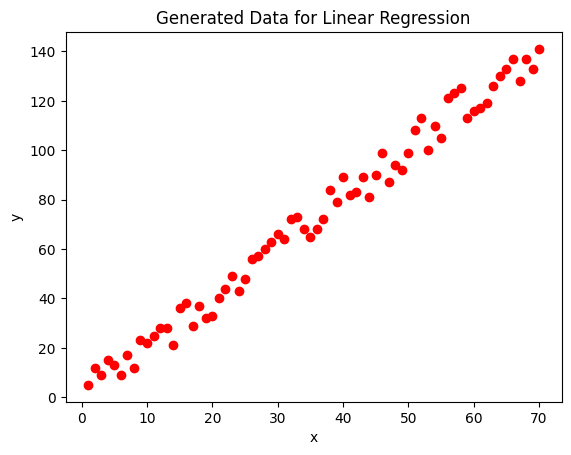

In [5]:
plt.scatter(X.numpy(), y.numpy(),color='red') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [6]:
torch.manual_seed(59)
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [7]:
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [8]:
loss_function = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  

In [9]:
epochs = 50 
losses = []
for epoch in range(1, epochs + 1): 
    optimizer.zero_grad() 
    y_pred = model(X) 
    loss = loss_function(y_pred, y) 
    losses.append(loss.item()) 
    loss.backward()
    optimizer.step()
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')


epoch:  1  loss: 5954.00195312  weight: 0.73509312  bias: 0.97723663
epoch:  2  loss: 2655.30761719  weight: 1.15417695  bias: 0.98620772
epoch:  3  loss: 1191.49755859  weight: 1.43334889  bias: 0.99220157
epoch:  4  loss: 541.92523193  weight: 1.61931860  bias: 0.99621207
epoch:  5  loss: 253.67466736  weight: 1.74320173  bias: 0.99890137
epoch:  6  loss: 125.76227570  weight: 1.82572591  bias: 1.00071061
epoch:  7  loss: 69.00058746  weight: 1.88069904  bias: 1.00193357
epoch:  8  loss: 43.81228256  weight: 1.91731894  bias: 1.00276589
epoch:  9  loss: 32.63482285  weight: 1.94171286  bias: 1.00333810
epoch: 10  loss: 27.67477417  weight: 1.95796239  bias: 1.00373697
epoch: 11  loss: 25.47373009  weight: 1.96878660  bias: 1.00402045
epoch: 12  loss: 24.49699783  weight: 1.97599685  bias: 1.00422692
epoch: 13  loss: 24.06353760  weight: 1.98079956  bias: 1.00438225
epoch: 14  loss: 23.87118340  weight: 1.98399854  bias: 1.00450337
epoch: 15  loss: 23.78580666  weight: 1.98612916  bia

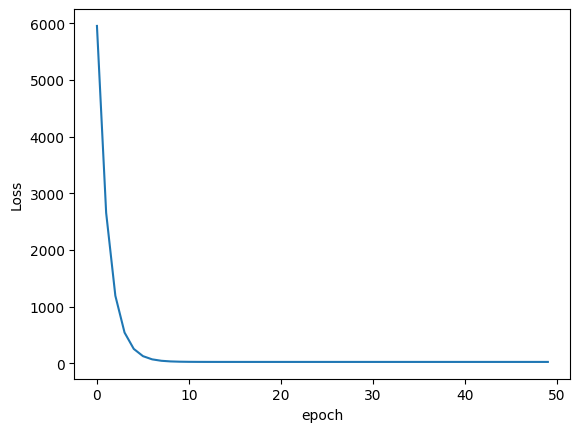

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()